In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('skroutz_batteries.csv')
data.head()

,471597,dynamic 45ah 360aen,5222,122777,Dynamic 45Ah 360AEN,1695,Car & Boat Batteries
0,471599,bosch 41ah a en 360 s3001,5222,122778,Bosch S3001 41AH 360A,1695,Car & Boat Batteries
1,471600,bataria bosch 41ah a en 360 s3001,3311,122778,Bosch S3001 41AH 360A,1695,Car & Boat Batteries
2,471601,bataria bosch s3001 12v capacity 20hr 41 ah en...,4538,122778,Bosch S3001 41AH 360A,1695,Car & Boat Batteries
3,471602,bataria aftokinitou bosch s3001 12v 41ah 360en...,1506,122778,Bosch S3001 41AH 360A,1695,Car & Boat Batteries
4,471603,bataria bosch s3 41ah/360a dexia,3056,122778,Bosch S3001 41AH 360A,1695,Car & Boat Batteries


In [2]:
data = data.drop(['471597', 'Car & Boat Batteries', '1695'],1 )
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,dynamic 45ah 360aen,5222,122777,Dynamic 45Ah 360AEN
0,4214,62,0,319
1,2298,33,0,319
2,2385,51,0,319
3,541,6,0,319
4,2373,29,0,319


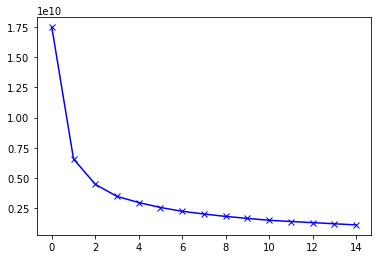

In [3]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 16):
    kmeans = KMeans(i, n_init=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss, 'bx-')
plt.show()


In [4]:
kmeans = KMeans(3)
Y_kmeans = kmeans.fit_predict(data)


from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(data)

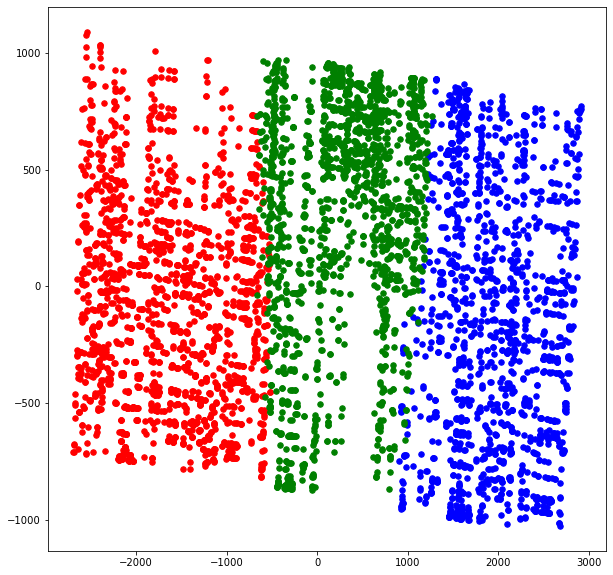

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y_kmeans==0, 0], x[Y_kmeans==0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[Y_kmeans==1, 0], x[Y_kmeans==1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[Y_kmeans==2, 0], x[Y_kmeans==2, 1], s=30, c='green', label='Cluster 3')
plt.show()
